In [93]:
import pandas as pd
import numpy as np

In [94]:
prediction_classification = pd.read_csv('knn_data_parameters.csv')
prediction_classification.head()

,temperature,humidity,soil_moisture_level,mustasa_classification,petchay_classification,kangkong_classification,pump_irrigation_mustasa,pump_irrigation_pechay,pump_irrigation_kangkong
0,30.1,84.9,80,GOOD,GOOD,GOOD,OFF,OFF,OFF
1,31.5,79.2,85,GOOD,BAD,BAD,OFF,OFF,OFF
2,32.0,76.0,80,GOOD,GOOD,BAD,OFF,OFF,OFF
3,32.2,76.6,80,GOOD,GOOD,GOOD,OFF,OFF,OFF
4,32.2,74.5,81,GOOD,BAD,BAD,OFF,OFF,OFF


In [95]:
prediction_classification.shape

(257, 9)

In [96]:
prediction_classification.isna().sum()

temperature                 0
humidity                    0
soil_moisture_level         0
mustasa_classification      0
petchay_classification      0
kangkong_classification     0
pump_irrigation_mustasa     0
pump_irrigation_pechay      0
pump_irrigation_kangkong    0
dtype: int64

In [97]:
X = prediction_classification

In [98]:
prediction_classification.isna().sum()

temperature                 0
humidity                    0
soil_moisture_level         0
mustasa_classification      0
petchay_classification      0
kangkong_classification     0
pump_irrigation_mustasa     0
pump_irrigation_pechay      0
pump_irrigation_kangkong    0
dtype: int64

In [99]:
prediction_classification['mustasa_classification'].unique()
prediction_classification['petchay_classification'].unique()
prediction_classification['kangkong_classification'].unique()

array(['GOOD', 'BAD'], dtype=object)

In [100]:
prediction_classification['pump_irrigation_mustasa'].unique()
prediction_classification['pump_irrigation_pechay'].unique()
prediction_classification['pump_irrigation_kangkong'].unique()

array(['OFF', 'ON'], dtype=object)

In [101]:
columns_to_replace = ['mustasa_classification', 'petchay_classification', 'kangkong_classification']

for column in columns_to_replace:
    prediction_classification[column] = prediction_classification[column].replace({'GOOD': 0, 'BAD': 1})

prediction_classification.tail()

,temperature,humidity,soil_moisture_level,mustasa_classification,petchay_classification,kangkong_classification,pump_irrigation_mustasa,pump_irrigation_pechay,pump_irrigation_kangkong
252,30.8,78.0,93,0,0,1,OFF,OFF,OFF
253,36.3,55.9,92,1,1,0,OFF,OFF,OFF
254,36.3,56.3,92,1,1,0,OFF,OFF,OFF
255,36.2,57.9,91,1,1,0,OFF,OFF,OFF
256,36.1,55.6,92,1,1,0,OFF,OFF,OFF


In [102]:
columns_to_replace_pump = ['pump_irrigation_mustasa', 'pump_irrigation_pechay', 'pump_irrigation_kangkong']

for column in columns_to_replace_pump:
    prediction_classification[column] = prediction_classification[column].replace({'OFF': 0, 'ON': 1})

prediction_classification.tail()


,temperature,humidity,soil_moisture_level,mustasa_classification,petchay_classification,kangkong_classification,pump_irrigation_mustasa,pump_irrigation_pechay,pump_irrigation_kangkong
252,30.8,78.0,93,0,0,1,0,0,0
253,36.3,55.9,92,1,1,0,0,0,0
254,36.3,56.3,92,1,1,0,0,0,0
255,36.2,57.9,91,1,1,0,0,0,0
256,36.1,55.6,92,1,1,0,0,0,0


In [103]:
X = prediction_classification.drop(['mustasa_classification','petchay_classification','kangkong_classification'], axis = 1)
X

,temperature,humidity,soil_moisture_level,pump_irrigation_mustasa,pump_irrigation_pechay,pump_irrigation_kangkong
0,30.1,84.9,80,0,0,0
1,31.5,79.2,85,0,0,0
2,32.0,76.0,80,0,0,0
3,32.2,76.6,80,0,0,0
4,32.2,74.5,81,0,0,0
...,...,...,...,...,...,...
252,30.8,78.0,93,0,0,0
253,36.3,55.9,92,0,0,0
254,36.3,56.3,92,0,0,0
255,36.2,57.9,91,0,0,0


In [104]:
y_mustasa = prediction_classification['mustasa_classification']
y_petchay = prediction_classification['petchay_classification']
y_kangkong = prediction_classification['kangkong_classification']

# If you want to combine the classifications into one array
y_combined = pd.concat([y_mustasa, y_petchay, y_kangkong], axis=1)
y_combined


,mustasa_classification,petchay_classification,kangkong_classification
0,0,0,0
1,0,1,1
2,0,0,1
3,0,0,0
4,0,1,1
...,...,...,...
252,0,0,1
253,1,1,0
254,1,1,0
255,1,1,0


In [105]:
# Separate features and target variables
X = prediction_classification[['temperature', 'humidity', 'soil_moisture_level']]
y_mustasa_pump = prediction_classification['pump_irrigation_mustasa']
y_petchay_pump = prediction_classification['pump_irrigation_pechay']
y_kangkong_pump = prediction_classification['pump_irrigation_kangkong']


In [106]:
from sklearn.model_selection import train_test_split

## Training and Testing the Model

In [107]:
# Split data for each crop
X_train_mustasa, X_test_mustasa, y_train_mustasa, y_test_mustasa = train_test_split(X, y_mustasa, train_size=0.8, random_state=200)
X_train_petchay, X_test_petchay, y_train_petchay, y_test_petchay = train_test_split(X, y_petchay, train_size=0.8, random_state=200)
X_train_kangkong, X_test_kangkong, y_train_kangkong, y_test_kangkong = train_test_split(X, y_kangkong, train_size=0.8, random_state=200)

In [108]:
# Split data for each crop
X_train_mustasa_pump, X_test_mustasa_pump, y_train_mustasa_pump, y_test_mustasa_pump = train_test_split(X, y_mustasa_pump, train_size=0.8, random_state=200)
X_train_petchay_pump, X_test_petchay_pump, y_train_petchay_pump, y_test_petchay_pump = train_test_split(X, y_petchay_pump, train_size=0.8, random_state=200)
X_train_kangkong_pump, X_test_kangkong_pump, y_train_kangkong_pump, y_test_kangkong_pump = train_test_split(X, y_kangkong_pump, train_size=0.8, random_state=200)

## Rows for Training Data

In [109]:
X_train_mustasa.shape

(205, 3)

In [110]:
X_train_petchay.shape

(205, 3)

In [111]:
X_train_kangkong.shape

(205, 3)

## Rows for Testing the Data

In [112]:
X_test_mustasa.shape
X_test_petchay.shape
X_test_kangkong.shape

(52, 3)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [114]:
# Train models for each crop
knn_mustasa = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)

In [115]:
knn_petchay = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)

In [116]:
knn_kangkong = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)

In [117]:
knn_mustasa.fit(X_train_mustasa, y_train_mustasa)

KNeighborsClassifier(metric='euclidean')

In [118]:
knn_petchay.fit(X_train_petchay, y_train_petchay)

KNeighborsClassifier(metric='euclidean')

In [119]:
knn_kangkong.fit(X_train_kangkong, y_train_kangkong)

KNeighborsClassifier(metric='euclidean')

In [120]:
# Train models for each crop's pump irrigation
knn_mustasa_pump = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn_petchay_pump = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)
knn_kangkong_pump = KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2)

In [121]:
knn_mustasa_pump.fit(X_train_mustasa_pump, y_train_mustasa_pump)
knn_petchay_pump.fit(X_train_petchay_pump, y_train_petchay_pump)
knn_kangkong_pump.fit(X_train_kangkong_pump, y_train_kangkong_pump)

KNeighborsClassifier(metric='euclidean')

In [162]:
# Save models
joblib.dump(knn_mustasa, 'knn_mustasa_prediction_model.joblib')
joblib.dump(knn_petchay, 'knn_petchay_prediction_model.joblib')
joblib.dump(knn_kangkong, 'knn_kangkong_prediction_model.joblib')

['knn_kangkong_prediction_model.joblib']

In [161]:
# Save models
joblib.dump(knn_mustasa_pump, 'knn_mustasa_pump_model.joblib')
joblib.dump(knn_petchay_pump, 'knn_petchay_pump_model.joblib')
joblib.dump(knn_kangkong_pump, 'knn_kangkong_pump_model.joblib')


['knn_kangkong_pump_model.joblib']

In [124]:
X_test_mustasa.head()

,temperature,humidity,soil_moisture_level
167,29.2,70.4,70
122,35.5,57.4,81
248,30.8,77.0,93
208,29.2,82.7,86
136,35.5,58.4,80


In [125]:
X_test_petchay.head()

,temperature,humidity,soil_moisture_level
167,29.2,70.4,70
122,35.5,57.4,81
248,30.8,77.0,93
208,29.2,82.7,86
136,35.5,58.4,80


In [126]:
X_test_kangkong.head()

,temperature,humidity,soil_moisture_level
167,29.2,70.4,70
122,35.5,57.4,81
248,30.8,77.0,93
208,29.2,82.7,86
136,35.5,58.4,80


In [127]:
y_test_mustasa.head()

167    1
122    1
248    0
208    1
136    1
Name: mustasa_classification, dtype: int64

In [128]:
y_test_petchay.head()

167    0
122    1
248    0
208    1
136    1
Name: petchay_classification, dtype: int64

In [129]:
y_test_kangkong.head()

167    0
122    0
248    1
208    0
136    0
Name: kangkong_classification, dtype: int64

In [130]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [131]:
# Evaluate models
predictions_mustasa = knn_mustasa.predict(X_test_mustasa)
predictions_mustasa

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [132]:
# Confusion matrices
cm_mustasa = confusion_matrix(y_test_mustasa, predictions_mustasa)
cm_mustasa

array([[20,  0],
       [ 4, 28]], dtype=int64)

In [133]:
variety_mapping = {0: 'GOOD', 1: 'BAD'}

input_mustasa_data = np.array([[35.6,58.7,80]])
mustasa_prediction_label = knn_mustasa.predict(input_mustasa_data)[0]
predicted_output_mustasa = variety_mapping.get(mustasa_prediction_label, 'Unknown')
print(predicted_output_mustasa)

BAD


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [134]:
# Assuming 'knn_petchay_pump' is the model for pump irrigation prediction for petchay
variety_mapping_pump = {0: 'OFF', 1: 'ON'}

input_mustasa_pump_data = np.array([[30.2,69,60]])  # Replace 'your_values_here' with actual data
mustasa_pump_prediction_label = knn_mustasa_pump.predict(input_mustasa_pump_data)[0]
predicted_output_mustasa_pump = variety_mapping_pump.get(mustasa_pump_prediction_label, 'Unknown')

print("Predicted Pump Irrigation Status for Mustasa:", predicted_output_mustasa_pump)

Predicted Pump Irrigation Status for Mustasa: ON


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [135]:
# Separate features and target variables
X = prediction_classification[['temperature', 'humidity', 'soil_moisture_level']]
y_mustasa_pump = prediction_classification['pump_irrigation_mustasa']
y_petchay_pump = prediction_classification['pump_irrigation_pechay']
y_kangkong_pump = prediction_classification['pump_irrigation_kangkong']

In [136]:
predictions_petchay = knn_petchay.predict(X_test_petchay)
predictions_petchay

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0], dtype=int64)

In [137]:
cm_petchay = confusion_matrix(y_test_petchay, predictions_petchay)
cm_petchay

array([[16,  1],
       [ 2, 33]], dtype=int64)

In [138]:
variety_mapping = {0: 'GOOD', 1: 'BAD'}

input_petchay_data = np.array([[61,63,67]])
petchay_prediction_label = knn_petchay.predict(input_petchay_data)[0]
predicted_output_petchay = variety_mapping.get(petchay_prediction_label, 'Unknown')
print(predicted_output_petchay)

BAD


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [139]:
# Assuming 'knn_petchay_pump' is the model for pump irrigation prediction for petchay
variety_mapping_pump = {0: 'OFF', 1: 'ON'}

input_petchay_pump_data = np.array([[32.2,74.5,66]])  # Replace 'your_values_here' with actual data
petchay_pump_prediction_label = knn_petchay_pump.predict(input_petchay_pump_data)[0]
predicted_output_petchay_pump = variety_mapping_pump.get(petchay_pump_prediction_label, 'Unknown')

print("Predicted Pump Irrigation Status for Petchay:", predicted_output_petchay_pump)

Predicted Pump Irrigation Status for Petchay: ON


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [140]:
predictions_kangkong = knn_kangkong.predict(X_test_kangkong)
predictions_kangkong

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [141]:
cm_kangkong = confusion_matrix(y_test_kangkong, predictions_kangkong)
cm_kangkong

array([[38,  1],
       [ 2, 11]], dtype=int64)

In [142]:
variety_mapping = {0: 'GOOD', 1: 'BAD'}

input_kangkong_data = np.array([[35.6,58.7,67]])
kangkong_prediction_label = knn_kangkong.predict(input_kangkong_data)[0]
predicted_output_kangkong = variety_mapping.get(kangkong_prediction_label, 'Unknown')
print(predicted_output_kangkong)

GOOD


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [143]:
# Assuming 'knn_petchay_pump' is the model for pump irrigation prediction for petchay
variety_mapping_pump = {0: 'OFF', 1: 'ON'}

input_kangkong_pump_data = np.array([[30.2,69,57]])  # Replace 'your_values_here' with actual data
kangkong_pump_prediction_label = knn_kangkong_pump.predict(input_kangkong_pump_data)[0]
predicted_output_kangkong_pump = variety_mapping_pump.get(kangkong_pump_prediction_label, 'Unknown')

print("Predicted Pump Irrigation Status for Mustasa:", predicted_output_kangkong_pump)

Predicted Pump Irrigation Status for Mustasa: OFF


c:\Users\angie\OneDrive\Documents\GitHub\SMARTS\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [144]:
# Evaluate models
predictions_mustasa_pump = knn_mustasa_pump.predict(X_test_mustasa_pump)
predictions_petchay_pump = knn_petchay_pump.predict(X_test_petchay_pump)
predictions_kangkong_pump = knn_kangkong_pump.predict(X_test_kangkong_pump)

In [145]:
# Confusion matrices
cm_mustasa_pump = confusion_matrix(y_test_mustasa_pump, predictions_mustasa_pump)
cm_petchay_pump = confusion_matrix(y_test_petchay_pump, predictions_petchay_pump)
cm_kangkong_pump = confusion_matrix(y_test_kangkong_pump, predictions_kangkong_pump)

In [146]:
import seaborn as sns
from matplotlib import pyplot as plt

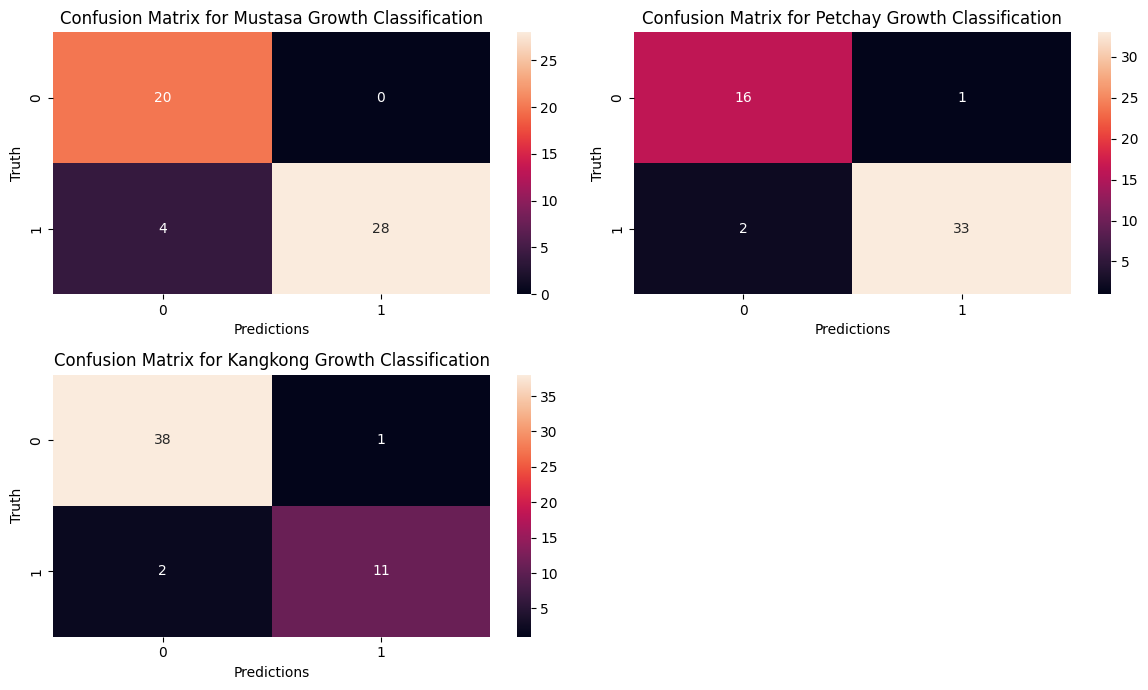

In [147]:
# Display confusion matrices
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
sns.heatmap(cm_mustasa, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Mustasa Growth Classification")

plt.subplot(2, 2, 2)
sns.heatmap(cm_petchay, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Petchay Growth Classification")

plt.subplot(2, 2, 3)
sns.heatmap(cm_kangkong, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Kangkong Growth Classification")

plt.tight_layout()
plt.show()

In [148]:
# Accuracy scores
accuracy_mustasa = accuracy_score(y_test_mustasa, predictions_mustasa)

In [149]:
accuracy_petchay = accuracy_score(y_test_petchay, predictions_petchay)

In [150]:
accuracy_kangkong = accuracy_score(y_test_kangkong, predictions_kangkong)

In [151]:
print("Accuracy for Mustasa:", accuracy_mustasa)
print("Accuracy for Petchay:", accuracy_petchay)
print("Accuracy for Kangkong:", accuracy_kangkong)

Accuracy for Mustasa: 0.9230769230769231
Accuracy for Petchay: 0.9423076923076923
Accuracy for Kangkong: 0.9423076923076923


In [152]:
print(classification_report(y_test_mustasa, predictions_mustasa))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.88      0.93        32

    accuracy                           0.92        52
   macro avg       0.92      0.94      0.92        52
weighted avg       0.94      0.92      0.92        52



In [153]:
print(classification_report(y_test_petchay, predictions_petchay))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.97      0.94      0.96        35

    accuracy                           0.94        52
   macro avg       0.93      0.94      0.94        52
weighted avg       0.94      0.94      0.94        52



In [154]:
print(classification_report(y_test_kangkong, predictions_kangkong))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        39
           1       0.92      0.85      0.88        13

    accuracy                           0.94        52
   macro avg       0.93      0.91      0.92        52
weighted avg       0.94      0.94      0.94        52



In [155]:
knn_mustasa.score(X_test_mustasa, y_test_mustasa)

0.9230769230769231

In [156]:
knn_petchay.score(X_test_petchay, y_test_petchay)

0.9423076923076923

In [157]:
knn_kangkong.score(X_test_kangkong, y_test_kangkong)

0.9423076923076923

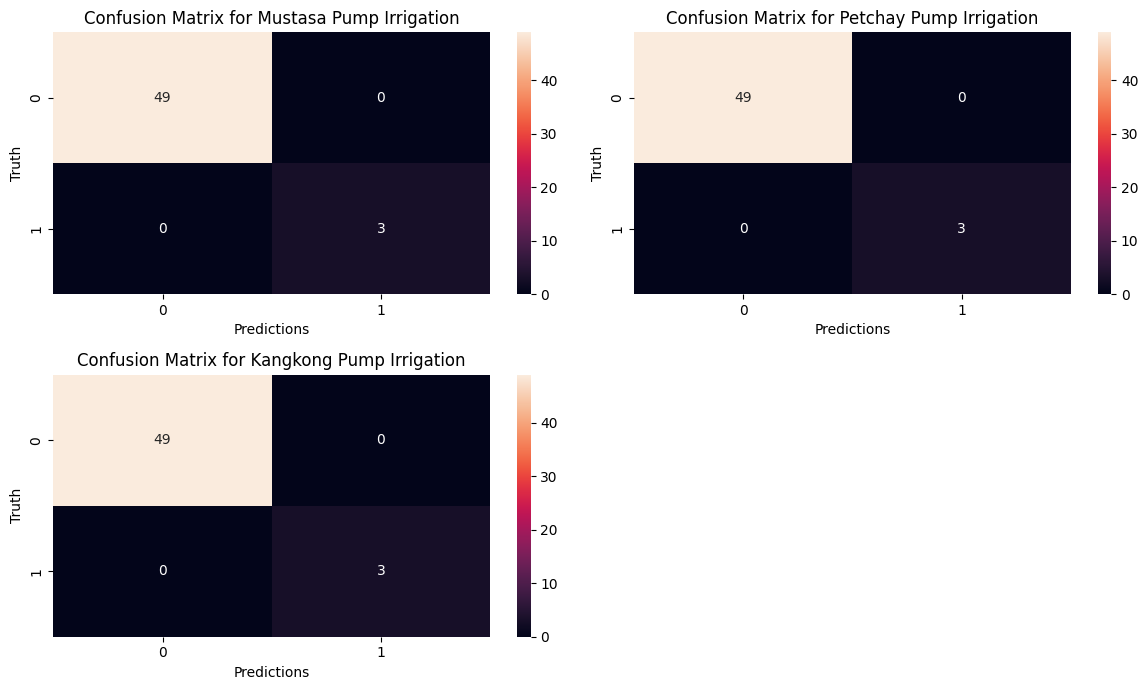

In [158]:
# Display confusion matrices
plt.figure(figsize=(12, 7))
plt.subplot(2, 2, 1)
sns.heatmap(cm_mustasa_pump, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Mustasa Pump Irrigation")

plt.subplot(2, 2, 2)
sns.heatmap(cm_petchay_pump, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Petchay Pump Irrigation")

plt.subplot(2, 2, 3)
sns.heatmap(cm_kangkong_pump, annot=True)
plt.xlabel("Predictions")
plt.ylabel("Truth")
plt.title("Confusion Matrix for Kangkong Pump Irrigation")

plt.tight_layout()
plt.show()

In [159]:
# Accuracy scores
accuracy_mustasa_pump = accuracy_score(y_test_mustasa_pump, predictions_mustasa_pump)
accuracy_petchay_pump = accuracy_score(y_test_petchay_pump, predictions_petchay_pump)
accuracy_kangkong_pump = accuracy_score(y_test_kangkong_pump, predictions_kangkong_pump)

print("Accuracy for Mustasa Pump Irrigation:", accuracy_mustasa_pump)
print("Accuracy for Petchay Pump Irrigation:", accuracy_petchay_pump)
print("Accuracy for Kangkong Pump Irrigation:", accuracy_kangkong_pump)

Accuracy for Mustasa Pump Irrigation: 1.0
Accuracy for Petchay Pump Irrigation: 1.0
Accuracy for Kangkong Pump Irrigation: 1.0


In [160]:
# Classification reports
print("Classification Report for Mustasa Pump Irrigation:\n", classification_report(y_test_mustasa_pump, predictions_mustasa_pump))
print("Classification Report for Petchay Pump Irrigation:\n", classification_report(y_test_petchay_pump, predictions_petchay_pump))
print("Classification Report for Kangkong Pump Irrigation:\n", classification_report(y_test_kangkong_pump, predictions_kangkong_pump))

# Scores for each model
print("Mustasa Pump Irrigation Model Score:", knn_mustasa_pump.score(X_test_mustasa_pump, y_test_mustasa_pump))
print("Petchay Pump Irrigation Model Score:", knn_petchay_pump.score(X_test_petchay_pump, y_test_petchay_pump))
print("Kangkong Pump Irrigation Model Score:", knn_kangkong_pump.score(X_test_kangkong_pump, y_test_kangkong_pump))

Classification Report for Mustasa Pump Irrigation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00         3

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Classification Report for Petchay Pump Irrigation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00         3

    accuracy                           1.00        52
   macro avg       1.00      1.00      1.00        52
weighted avg       1.00      1.00      1.00        52

Classification Report for Kangkong Pump Irrigation:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00         3

    accuracy             